In [10]:
import pandas as pd
import ray
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.graph_objects as go
from itertools import combinations
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                    StratifiedKFold, StratifiedShuffleSplit,
                                    cross_val_score)
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
import numpy as np
import joblib
from pandarallel import pandarallel
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re

In [11]:
binarity = ['E',
 'EA',
 'EB',
 'EP',
 'EW',
 'ECL|PULS|ROT',
 'EA+ACEP',
 'EA+ACV',
 'EA+BCEP',
 'EA+BE',
 'EA+CST',
 'EA+CWB',
 'EA+DSCT',
 'EA+DSCT+GDOR',
 'EA+DSCT+SPB',
 'EA+DSCT:',
 'EA+DSCTC',
 'EA+E',
 'EA+EA',
 'EA+EA+SPB',
 'EA+EB',
 'EA+ELL',
 'EA+GCAS',
 'EA+GDOR|ROT',
 'EA+HB',
 'EA+PUL',
 'EA+PULS',
 'EA+PULS|ROT',
 'EA+R',
 'EA+ROT',
 'EA+SPB',
 'EA+SPB:',
 'EA+VAR',
 'EA/AR',
 'EA/AR:',
 'EA/D',
 'EA/D:',
 'EA/DM',
 'EA/DM+ACV',
 'EA/DM:',
 'EA/DS',
 'EA/DS:',
 'EA/EL',
 'EA/GS',
 'EA/GS:',
 'EA/HW',
 'EA/K',
    'ECL',           
 'EA/KE',
 'EA/KE:',
 'EA/SD',
 'EA/SD:',
 'EA/WD:',
 'EA/WR',
 'EA:',
 'EA|EB',
 'EB',
 'EB+DSCT',
 'EB+GCAS',
 'EB+VAR',
 'EB/AR',
 'EB/D',
 'EB/D:',
 'EB/DM',
 'EB/DM/WR',
 'EB/DM:',
 'EB/GS',
 'EB/GS+ACYG',
 'EB/GS/D',
 'EB/K',
 'EB/KE',
 'EB/KE:',
 'EB/SD',
 'EB/SD:',
 'EB/WR',
 'EB:',
 'EB:/KE:',
 'EB|EW',
 'EC',
 'EC+EA',
 'EC:',
 'ECL|PULS|ROT',
 'EC|DCEP-FO',
 'EC|DCEP-FO|ESD',
 'EC|DCEP-FU|ESD',
 'EC|DSCT|DSCTr|ESD',
 'EC|ESD',
 'EC|RRAB|DCEP-FO|ESD',
 'EC|RRC',
 'EC|RRC|BCEP|DSCT|ESD',
 'EC|RRC|DSCT|ESD',
 'EC|RRC|ESD',
 'EC|RRC|ESD|ELL',
 'ED',
 'ED:',
 'ED|ESD',
 'ED|ESD|SR',
 'ELL',
 'ELL+BCEP:',
 'ELL+DSCT',
 'ELL+ELL:',
 'ELL+GCAS',
 'ELL+HMXB',
 'ELL+SR',
 'ELL/DM',
 'ELL/KE',
 'ELL/RS/BY',
 'ELL:',
 'ELL:+EW:',
 'ELL:|DSCT',
 'ELL|DSCT',
 'ELL|EB',
 'EP:',
 'ESD',
 'ESD:',
 'ESD|ACV|EC',
 'ESD|BCEP|DSCT|EC',
 'ESD|DCEP-FO|EC',
 'ESD|DCEP-FU',
 'ESD|DCEP-FU|ACV|ED',
 'ESD|DCEP-FU|DCEP-FO|EC|ED',
 'ESD|DCEP-FU|DCEP-FO|EC|ED',
 'ESD|DCEP-FU|EC',
 'ESD|DCEP-FU|EC|ED',
 'ESD|DCEP-FU|ED',
 'ESD|DSCT|EC',
 'ESD|EC',
 'ESD|EC|ED',
 'ESD|EC|MISC',
 'ESD|ED',
 'ESD|ED|SR',
 'ESD|RRAB|DCEP-FO|EC|ED',
 'ESD|RRC|DSCT|EC|ED',
 'ESD|RRC|EC',
 'EW',
 'EW+BE',
 'EW/DM:',
 'EW/DW',
 'EW/KE',
 'EW/KE:',
 'EW/KW',
 'EW:',
 'EW|DSCT',
 'EW|EA',
 'EW|ELL',
 'HMXB',
 'HMXB+BCEP:',
 'HMXB+E',
 'HMXB+GCAS',
 'HMXB+LERI:',
 'HMXB/BHXB+ELL',
 'HMXB/BHXB/XN+ELL+E',
 'HMXB/XP',
 'HMXB/XP+BE',
 'HMXB/XP+E',
 'HMXB/XP+ELL',
 'HMXB/XP+GCAS',
 'HB',
 'HMXB/XPR',
 'HMXB:',
 'HMXB:+GCAS:',
 'LMXB+E',
 'LMXB/R',
 'RS|BY',
 'ZAND',
 'RS']
def check_star_type(star, binarity):
    try:
        # Dividimos la cadena 'star' en componentes usando cualquier símbolo no alfabético como delimitador
        components = re.split(r'[^a-zA-Z]+', star)

        # Para cada componente, si se encuentra en 'binarity', retornamos 'eclipsante'
        for comp in components:
            if comp in binarity:
                return 'multiplicity'
        
        # Si ninguno de los componentes está en 'binarity', retornamos 'other'
        return 'other'
    except Exception as e:
        # Puedes hacer algo con el error si lo necesitas, por ejemplo:
        # print(f"Ha ocurrido un error: {e}")
        return 'error'

def optimize_hyperparameters(X, y):
    # Initialize a BalancedRandomForestClassifier
    clf = BalancedRandomForestClassifier()

    # Define hyperparameters grid
    param_grid = {
        'n_estimators': [200,500,800],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'sampling_strategy': ['majority', 'not minority', 'not majority', 'all', 'auto']
    }

    # Set up k-fold cross-validation
    kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

    # Macro-recall scorer
    macro_recall = make_scorer(recall_score, average='macro')

    # Grid search with cross-validation
    grid_search = GridSearchCV(clf, param_grid, cv=kfold, scoring=macro_recall,n_jobs=-1, verbose=1)
    grid_search.fit(X, y)

    # Return best parameters and best score
    return grid_search

def preprocess_features(data,columns,bad_values):
    """
    Realiza el preprocesamiento de las características especificadas.

    Args:
    - data (pd.DataFrame): DataFrame original con los datos.

    Returns:
    - data (pd.DataFrame): DataFrame procesado con características adicionales y filas inválidas eliminadas.
    """
    
    # Busca valores 999 o -999 en las columnas especificadas
    invalid_values = data[columns].isin([bad_values, -bad_values]).sum()

    # Filtra y muestra solo las columnas que tienen estos valores inválidos
    columns_with_invalids = invalid_values[invalid_values > 0]

    if columns_with_invalids.empty:
        print(f" Todas las columnas tienen datos válidos, sin valores {bad_values} o -{bad_values}.")
    else:
        print(f"Las siguientes columnas tienen valores {bad_values} o -{bad_values}:\n{columns_with_invalids}")

    # Filtra el DataFrame para excluir filas con valores 999 o -999 en las columnas especificadas
    data = data[~data[columns].isin([bad_values, -bad_values]).any(axis=1)].reset_index(drop=True)

    return data

In [12]:
pandarallel.initialize(nb_workers=12,progress_bar=True)

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [187]:
df = pd.read_csv("/home/marcelo/nico/MasivasData/Skiff_zari_gaia_OGLE_Splus_VSX.csv")
df = df.rename(columns={'SpType':'skiff_type',
                   'Type': 'vsx_type',
                    'types':'ogle_type',
                    'best_class_name':'gaia_type',
                    'best_class_score':'gaia_type_score',
                    'S_plus_prediction':'splus_type',
                    'S_plus_probability':'splus_type_score',
                    'Subtype':'ogle_type'
                   })

/tmp/ipykernel_10100/4187641784.py:1: DtypeWarning: Columns (72,122,125,127,130,131,133,141,163,166,167,186,193) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/marcelo/nico/MasivasData/Skiff_zari_gaia_OGLE_Splus_VSX.csv")


In [14]:
df['classification'] = df.parallel_apply(lambda row: check_star_type(row["vsx_type"],binarity), axis=1)


In [15]:
vsx = df.loc[(df['vsx_type'].notna())&(df['vsx_type']!='*')&(df['vsx_type']!='VAR')]

In [16]:
vsx = vsx.drop_duplicates(subset='source_id_1',keep='first')

<Axes: xlabel='ra_1_1', ylabel='dec_1_1'>

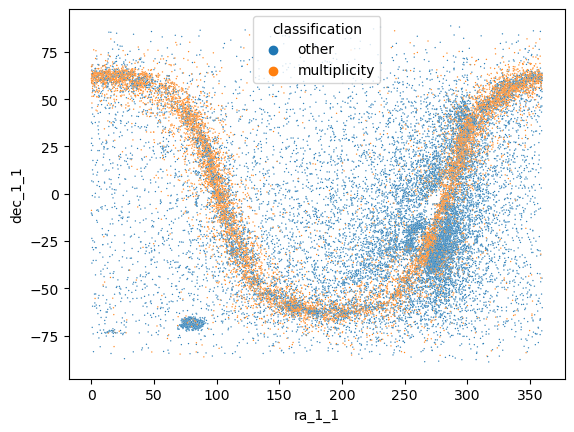

In [17]:
sns.scatterplot(data=vsx,x='ra_1_1',y='dec_1_1',s=1,hue='classification')

In [41]:
le = LabelEncoder()
le_qlf = LabelEncoder()
vsx['multiplicity'] = le.fit_transform(vsx['classification'])
vsx['Qlf'] = le_qlf.fit_transform(vsx['ph_qual'])

vsx['multiplicity'] = vsx['multiplicity'].apply(lambda x: 1 if x == 0 else 0)


In [42]:
mag_features = ['j_m', 'h_m', 'ks_m','phot_g_mean_mag',
                           'phot_bp_mean_mag', 'phot_rp_mean_mag']
astrometric = [
    "parallax_error",
    "parallax_over_error",
    "pmra",
    "pmdec",
    "pmdec_error",
    "pmra_error",
    "astrometric_sigma5d_max",
    "astrometric_excess_noise",
    "visibility_periods_used",
    "ruwe",
    "astrometric_gof_al",
    "ipd_gof_harmonic_amplitude",
    "ipd_frac_odd_win",
    "ipd_frac_multi_peak",
    "matched_transits_removed",
    "astrometric_params_solved",
    "astrometric_excess_noise_sig"
]

mag_errors = ['phot_rp_mean_flux_over_error','phot_bp_mean_flux_over_error','phot_g_mean_flux_over_error','Qlf']


In [163]:
vsx = preprocess_features(vsx,mag_features+astrometric+mag_errors,np.nan)


 Todas las columnas tienen datos válidos, sin valores nan o -nan.


In [44]:
from itertools import combinations
colors =[]
for v in combinations(mag_features, 2):
    vsx[f"{v[0]}-{v[1]}"] = vsx[v[0]] - vsx[v[1]]
    colors.append(f"{v[0]}-{v[1]}")

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

class DataFrameScaler:
    def __init__(self):
        self.scalers = {}

    def scale(self, df):
        """
        Escala las columnas del DataFrame a media 0 y desviación estándar 1.
        """
        scaled_df = df.copy()
        for column in df.columns:
            scaler = StandardScaler()
            scaled_df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1)).flatten()
            self.scalers[column] = scaler
        return scaled_df

    def inverse_scale(self, df):
        """
        Devuelve el DataFrame escalado a su estado original.
        """
        original_df = df.copy()
        for column in df.columns:
            scaler = self.scalers.get(column)
            if scaler:
                original_df[column] = scaler.inverse_transform(df[column].values.reshape(-1, 1)).flatten()
        return original_df

# Uso de la clase:
# df: tu dataframe
scaler = DataFrameScaler()
vsx[mag_features + colors + astrometric + mag_errors] = scaler.scale(vsx[mag_features + colors + astrometric + mag_errors])
# original_df = scaler.inverse_scale(scaled_df)


In [54]:
X = vsx[mag_features + colors + astrometric + mag_errors]
y = vsx['multiplicity']

In [57]:
grid_search =  optimize_hyperparameters(X, y)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


/home/marcelo/anaconda3/envs/splus/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [66]:
best_params, best_score = grid_search.best_params_, grid_search.best_score_

In [60]:
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns
sorted_features = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)

In [67]:
pd.DataFrame([best_params]).to_csv(f'/home/marcelo/nico/MasivasData/best_param_vsx_rf.csv',index=False)


In [97]:
ray.init()

array = np.zeros((2,2,20))

@ray.remote
def parallel_function(train_index, test_index, iteration, X, y, best_params):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_brfc = BalancedRandomForestClassifier(**best_params)
    best_brfc.fit(X_train, y_train)
    y_pred = best_brfc.predict(X_test)

    precision_per_class = precision_score(y_test, y_pred, average=None)
    recall_per_class = recall_score(y_test, y_pred, average=None)
    f1_per_class = f1_score(y_test, y_pred, average=None)
    array_2,_ = C_M(y_test, y_pred)
    
    results = []
    classes = list(set(y_test))
    for cls, precision, recall, f1 in zip(classes, precision_per_class, recall_per_class, f1_per_class):
        results.append({
            'Iteration': iteration,
            'Class': cls,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })
    return array_2, results

def C_M(label,predict_label):
    array = np.array(tf.math.confusion_matrix(label,predict_label) )
    df = pd.DataFrame(array)
    perc = df.copy()
    cols = perc.columns.values
    perc[cols] = perc[cols].div(perc[cols].sum(axis=1), axis=0).multiply(100)
    annot = df.round(2).astype(str) + "\n" + perc.round(1).astype(str) + "%"
    return array, annot

results = []
sss = StratifiedShuffleSplit(n_splits=20, test_size=0.2, random_state=42)

futures = [parallel_function.remote(train_index, test_index, iteration, X, y, best_params) for iteration, (train_index, test_index) in enumerate(sss.split(X, y))]

iteration = 0
for future in ray.get(futures):
    array_2, result = future
    array[:,:,iteration] = array_2
    results.extend(result)
    iteration += 1
ray.shutdown()

RuntimeError: Maybe you called ray.init twice by accident? This error can be suppressed by passing in 'ignore_reinit_error=True' or by calling 'ray.shutdown()' prior to 'ray.init()'.

In [98]:
results = pd.DataFrame(results)

In [102]:
CM_array = array.mean(axis=2)
CM_std = array.std(axis=2)


In [140]:
def plot_confusion_matrix(CM_array, CM_std,labels):
    """
    Función para graficar una matriz de confusión con errores estándar.
    
    Parámetros:
    - CM_array: Matriz de confusión.
    - CM_std: Matriz de errores estándar.
    """
    # Calculate the scaling factor
    factor = math.sqrt(10**2 + 8**2) / math.sqrt(6**2 + 4**2)

    # Convertir la matriz de confusión a porcentaje
    CM_percentage = CM_array / CM_array.sum(axis=1)[:, None] * 100
    CM_std_percentage = CM_std / CM_array.sum(axis=1)[:, None] * 100

    # Crear el plot
    plt.figure(figsize=(7, 7))

    # Adjust the font size based on the scaling factor
    base_fontsize = 14
    adjusted_fontsize = int(base_fontsize * factor)

    # Crear un array con las anotaciones que incluyen el error
    annotations = np.array([
        [f"{CM_percentage[i, j]:.2f} ± {CM_std_percentage[i, j]:.2f}%" for j in range(CM_percentage.shape[1])]
        for i in range(CM_percentage.shape[0])
    ])

    # Crear el heatmap
    sns.heatmap(CM_percentage, annot=annotations, fmt="", cmap="YlGnBu", cbar=False,
                annot_kws={"size": 14}, linewidths=0.5, linecolor="gray",
                xticklabels=labels, yticklabels=labels)

    # Configuración de las etiquetas
    plt.ylabel('True Label', fontsize=adjusted_fontsize)
    plt.xlabel('Predicted Label', fontsize=adjusted_fontsize)
    plt.xticks(rotation=45, fontsize=adjusted_fontsize)  # Rotación de las etiquetas del eje X y ajuste del fontsize
    plt.yticks(fontsize=adjusted_fontsize)

    plt.savefig('/home/marcelo/nico/MasivasData/Confusion_matrix.pdf', format='pdf', bbox_inches='tight')
    plt.show()



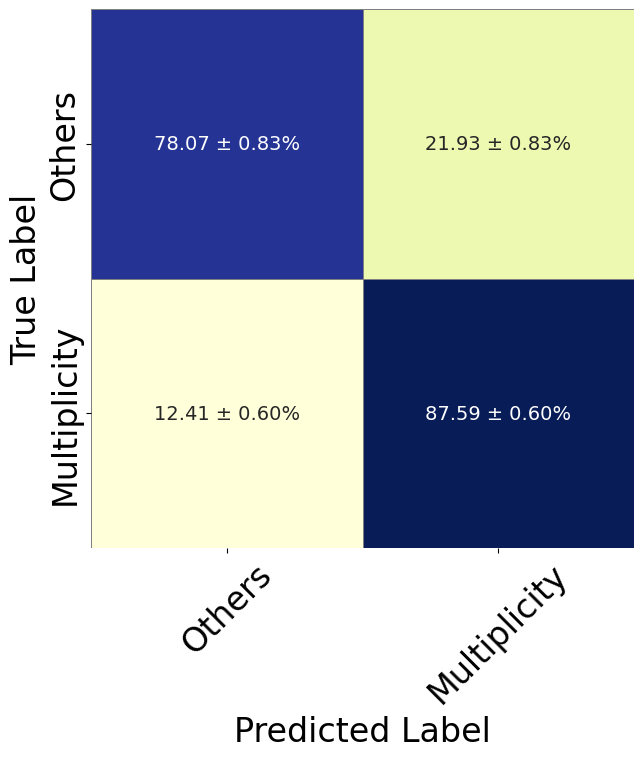

In [141]:
plot_confusion_matrix(CM_array, CM_std,["Others", "Multiplicity"])

In [138]:
results = pd.concat([results,
           results.groupby('Class').mean().reset_index().rename(index={0: 'mean',1:'mean'}),
           results.groupby('Class').std().reset_index().rename(index={0: 'std',1:'std'})
          ])

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_brfc = BalancedRandomForestClassifier(**best_params)
best_brfc.fit(X_train, Y_train)
filename = f'/home/marcelo/nico/MasivasData/vsx_rf.sav'
joblib.dump(best_brfc, filename)

['/home/marcelo/nico/MasivasData/vsx_rf.sav']

In [183]:
vsx.loc[X_train.index,'vsx_split'] = 'train'
vsx.loc[X_test.index,'vsx_split'] = 'test'

In [185]:
vsx[mag_features + colors + astrometric + mag_errors] = scaler.inverse_scale(vsx[mag_features + colors + astrometric + mag_errors])

In [191]:
No_usado = df.loc[(df['vsx_type'].isna())|(df['vsx_type']=='*')|(df['vsx_type']=='VAR')]

In [192]:
df = pd.concat([No_usado,vsx])

In [159]:
from itertools import combinations

def create_color_columns(mag_features, df):
    """
    Crea columnas de colores en el DataFrame df basadas en las combinaciones de mag_features.
    
    Parámetros:
    - mag_features: Lista de características para hacer combinaciones y crear colores.
    - df: DataFrame donde se añadirán las nuevas columnas de colores.
    
    Retorna:
    - df: DataFrame modificado con las nuevas columnas de colores.
    - colors: Lista de los nombres de las nuevas columnas de colores.
    """
    colors = []
    for v in combinations(mag_features, 2):
        df[f"{v[0]}-{v[1]}"] = df[v[0]] - df[v[1]]
        colors.append(f"{v[0]}-{v[1]}")
    return df, colors


In [193]:
df, colors = create_color_columns(mag_features, df)


In [194]:
df['Qlf'] = le_qlf.fit_transform(df['ph_qual'])


In [195]:
df = preprocess_features(df,mag_features+astrometric+mag_errors,np.nan)

Las siguientes columnas tienen valores nan o -nan:
phot_bp_mean_mag                11952
phot_rp_mean_mag                11914
phot_rp_mean_flux_over_error    11914
phot_bp_mean_flux_over_error    11952
dtype: int64


In [196]:
scaler = DataFrameScaler()
df[mag_features + colors + astrometric + mag_errors] = scaler.scale(df[mag_features + colors + astrometric + mag_errors])

In [197]:
df['multiplicity'] = best_brfc.predict(df[mag_features + colors + astrometric + mag_errors])


In [198]:
df['multiplicity_probability'] = best_brfc.predict_proba(df[mag_features + colors + astrometric + mag_errors])[:, 1]

In [199]:
df[mag_features + colors + astrometric + mag_errors] = scaler.inverse_scale(df[mag_features + colors + astrometric + mag_errors])

In [281]:
df.to_csv('/home/marcelo/nico/MasivasData/Skiff_zari_gaia_OGLE_Splus_vsxpredicted.csv',index=False)

In [284]:
df[['source_id_1','vsx_type','vsx_per','ogle_type','ogle_subtype','ogle_per','ogle_field','gaia_type','gaia_type_score','phot_variable_flag','splus_split','splus_type','splus_type_score','multiplicity','multiplicity_probability','vsx_split']].to_csv('/home/marcelo/nico/MasivasData/short_Skiff_zari_gaia_OGLE_Splus_vsxpredicted.csv',index=False)